# Problem Set 1, due September 4th at 11:59pm 

This problem set is meant to help you familiarize yourself with Python and Pandas. This is meant to be a very gentle introduction -- if you find this problem set to be difficult, you might want to consider taking a more introductory course.

### Before You Start
For this problem set, you should download INF0251-PS1.ipynb from bCourses. Create a local copy of the notebook and rename it LASTNAME_FIRSTNAME-PS1.ipynb. Then edit your renamed file directly in your browser by typing:
```
jupyter notebook <name_of_downloaded_file>
```

Make sure the following libraries load correctly (hit Ctrl-Enter).


In [1]:
#IPython is what you are using now to run the notebook
import IPython
print("IPython version:      %6.6s (need at least 1.0)" % IPython.__version__)

# Numpy is a library for working with Arrays
import numpy as np
print("Numpy version:        %6.6s (need at least 1.7.1)" % np.__version__)

# SciPy implements many different numerical algorithms
import scipy as sp
print("SciPy version:        %6.6s (need at least 0.12.0)" % sp.__version__)

# Pandas makes working with data tables easier
import pandas as pd
print("Pandas version:       %6.6s (need at least 0.11.0)" % pd.__version__)

# Module for plotting
import matplotlib
print("Maplotlib version:    %6.6s (need at least 1.2.1)" % matplotlib.__version__)

# SciKit Learn implements several Machine Learning algorithms
import sklearn
print("Scikit-Learn version: %6.6s (need at least 0.13.1)" % sklearn.__version__)
pd.set_option('display.max_columns',0)

IPython version:       5.3.0 (need at least 1.0)
Numpy version:        1.12.1 (need at least 1.7.1)
SciPy version:        0.19.0 (need at least 0.12.0)
Pandas version:       0.20.1 (need at least 0.11.0)
Maplotlib version:     2.0.2 (need at least 1.2.1)
Scikit-Learn version: 0.18.1 (need at least 0.13.1)


### Working in a group?
List the names of other students with whom you worked on this problem set:
- Judy Jinn

---

## Introduction to the assignment

For this assignment, you will be using the [Boston Housing Prices Data Set](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names).  Please read about the dataset carefully before continuing -- it is worth investing a few minutes up front otherwise you are likely to be hopelessly confused! Also, if you're new to analyzing data in Python, please make sure to read the relevant readings linked to on Canvas before beginning, otherwise you'll be stabbing in the dark.

Use the following commands to load the dataset:

In [2]:
from sklearn.datasets import load_boston
bdata = load_boston()

The following commands will provide some basic information about the shape of the data:

In [3]:
print(bdata.keys())
print(bdata.feature_names)
print(bdata.data.shape)
print(bdata.target.shape)

# uncomment the following if you want to see a lengthy description of the dataset
# print bdata.DESCR

dict_keys(['data', 'target', 'feature_names', 'DESCR'])
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
(506, 13)
(506,)


In [4]:
boston = pd.DataFrame(bdata.data)

In [5]:
boston.columns = bdata.feature_names[:]
print(boston.shape)

(506, 13)


---

## Part 1: Descriptive analysis

### 1.1: Explore the data

Let's dig into the data a bit to see what we're dealing with. The first thing to do is to make sure you understand how the data is organized, what the data types are, whether there is any missing data, and so forth. Get your bearings on your own, then answer the following questions.

 - 1.1.1: How many different variables are there in the dataset, and how many different observations?
 - 1.1.2: How many instances are classified as neighborhoods where the tract bounds the Charles River? 
 - 1.1.3: Show that dataset does not contain any missing values.
 - 1.1.4: Display the property tax rate in the 5 neighborhoods that have the highest median housing price.

In [6]:
# 1.1.1: How many different variables are there in the dataset, and how many different observations?
# the number of columns are the number of variables
boston['MEDV']=bdata.target
print('total number of variables:', len(boston.columns))
print('total number of observations:', boston.shape[0])

# 1.1.2: How many instances are classified as neighborhoods where the tract bounds the Charles River?
print('number of tract bounds to Charles River:', boston['CHAS'].sum())

# 1.1.3: Show that dataset does not contain any missing values.
print('Are there any missing values?', boston.isnull().values.any())

# 1.1.4: Display the property tax rate in the 5 neighborhoods that have the highest median housing price.
max_med = boston['MEDV'].max()
print(boston[boston['MEDV']==max_med].sort_index().head(5))

total number of variables: 14
total number of observations: 506
number of tract bounds to Charles River: 35.0
Are there any missing values? False
        CRIM   ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  PTRATIO       B  LSTAT  MEDV
161  1.46336  0.0  19.58   0.0  0.605  7.489  90.8  1.9709  5.0  403.0     14.7  374.43   1.73  50.0
162  1.83377  0.0  19.58   1.0  0.605  7.802  98.2  2.0407  5.0  403.0     14.7  389.61   1.92  50.0
163  1.51902  0.0  19.58   1.0  0.605  8.375  93.9  2.1620  5.0  403.0     14.7  388.45   3.32  50.0
166  2.01019  0.0  19.58   0.0  0.605  7.929  96.2  2.0459  5.0  403.0     14.7  369.30   3.70  50.0
186  0.05602  0.0   2.46   0.0  0.488  7.831  53.6  3.1992  3.0  193.0     17.8  392.63   4.45  50.0


*Provide your answers below:*

 - 1.1.1: 13 continuous variables and the 14th variable which is a target variable, but I added it into the data set in order to answer this question in its entirety. In total with the 14 variables and there are 506 observations.
 - 1.1.2: 35 tracts bound the Charles River
 - 1.1.3: No missing values contained from using isnull()
 - 1.1.4: The values are 403.0, 403.0, 403.0, 403.0, 193.0

### 1.2: Answer some basic questions
 - 1.2.1: What is the median housing price in Boston's most expensive neighborhood?
 - 1.2.2: How many neighborhoods have, on average, less than 5 rooms per dwelling?
 - 1.2.3: What is the property tax rate in the most expensive neighborhood that is also adjacent to the Charles River?
 - 1.2.4: What is the crime rate in the neighborhood with the highest median housing price? 
 - 1.2.5: What is the crime rate in the neighborhood with the lowest median housing price?

In [7]:
# 1.2.1: What is the median housing price in Boston's most expensive neighborhood?
print('median housing price in Bostons most expensive neighborhood?')
print(boston.sort_values('MEDV', ascending=False).head(5)['MEDV'])

# 1.2.2: How many neighborhoods have, on average, less than 5 rooms per dwelling?
print('neighborhoods with less than 5 rooms ')
print(len(boston[boston['RM'] < 5.0]))

# 1.2.3: What is the property tax rate in the most expensive neighborhood that is also adjacent to the Charles River?
print('tax rate in the most expensive neighborhood that is also adjacent to the Charles River')
tmp = boston[boston['CHAS'] ==1.0]
print(tmp[tmp['MEDV']==max_med].sort_index().iloc[0]['TAX'])


# 1.2.4: What is the crime rate in the neighborhood with the highest median housing price?
print('crime rate in the neighborhood with the highest median housing price')
print(boston[boston['MEDV']==max_med].sort_index().iloc[0]['CRIM'])

# 1.2.5: What is the crime rate in the neighborhood with the lowest median housing price?
print('crime rate in the neighborhood with the lowest median housing price')
min_med = boston['MEDV'].min()
print(boston[boston['MEDV']==min_med].sort_index().iloc[0]['CRIM'])

median housing price in Bostons most expensive neighborhood?
283    50.0
225    50.0
369    50.0
370    50.0
371    50.0
Name: MEDV, dtype: float64
neighborhoods with less than 5 rooms 
15
tax rate in the most expensive neighborhood that is also adjacent to the Charles River
403.0
crime rate in the neighborhood with the highest median housing price
1.46336
crime rate in the neighborhood with the lowest median housing price
38.3518


*Provide our answers below:*

 - 1.2.1: $50,000
 - 1.2.2: 15
 - 1.2.3: 403.0
 - 1.2.4: 1.46336
 - 1.2.5: 38.3518

### 1.3: Summary statistics

Create a clean, organized table that shows just the following information (no more, no less) for each variable in the dataset. Note that your table should have K rows (one for each variable) and 7 columns, ordered as below:
 - The name of the variable
 - The number of observations with non-missing values
 - The mean of the variable
 - The standard deviation of the variable
 - The minimum value of the variable
 - The median of the variable
 - The maximum value of the variable

In [8]:
boston_stats = boston.describe().transpose()
boston_stats = boston_stats.drop(['25%', '75%'], axis=1)
boston_stats = boston_stats.reset_index()
boston_stats = boston_stats.rename(index=str, columns={'50%': 'med', 'index': 'vars'})

### 1.4 Simple statistical tests

Using a t-test, compare the median house value in locations that are adjacent to the Charles River to locations that are not adjacent to the Charles River. Do you reject the null hypothesis that prices are equivalent?

In [9]:
adj_river = boston[boston['CHAS'] ==1.0]
not_adj = boston[boston['CHAS'] !=1.0]

import scipy.stats as stats
t, p =stats.ttest_ind(adj_river['MEDV'], not_adj['MEDV'], equal_var=True)
print('T =',t,'   p =',p)

print('Adjacent to the river: ',adj_river['MEDV'].mean(),'±', 
    adj_river['MEDV'].std(), '   n =', len(adj_river['MEDV'].unique())
    )
print('Not adjacent to the river: ',not_adj['MEDV'].mean(),'±', not_adj['MEDV'].std(), 
    '   n =', len(not_adj['MEDV'].unique())
    )

T = 3.99643746609    p = 7.39062317052e-05
Adjacent to the river:  28.44 ± 11.816643297634458    n = 28
Not adjacent to the river:  22.093842887473482 ± 8.831362409577903    n = 221


I would reject the null hypothesis that the median housing values of locations that are adjacent to the Charles River are the same as those housing values which are not adjacent ot the river. I found a p-value of 7.39e-05 which passes a signifance threshold of 0.05.

We can see that the average median housing value of properties close to the river are higher than those which are farther away.

---

## Part 2: Histograms and Scatterplots


### 2.1: Histogram of housing prices

Below you will find some very basic code to make a very basic histogram of median housing prices (the "target" variable) for your dataset.  Your first task is to make this graph look pretty by doing the following:

1. Add appropriate labels to the x and y axes, make sure to include units
2. Change the bin width on the histogram to be $1000
3. Remove the axes on the top and right side of the plot window
4. Change the color of the bars to be green, and remove the black borders from the bars


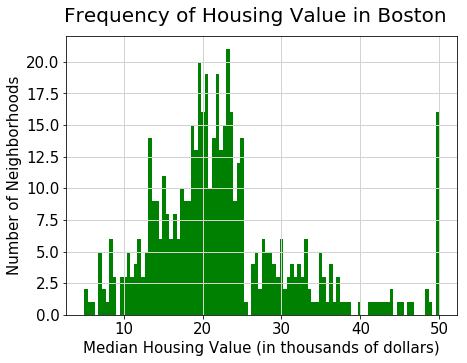

In [10]:
# prepare IPython to work with matplotlib and import the library to something convenient
# %matplotlib inline  
import matplotlib.pyplot as plt  

# edit the code below to make the graph look good
bins = 100

fig = plt.figure(figsize=(7,5))
ax = fig.gca()
plt.style.use('ggplot')
ax.grid(color='lightgray', linestyle='-', linewidth=1)
fig.suptitle('Frequency of Housing Value in Boston', fontsize = 20)

ax.hist(bdata.target, bins, facecolor='green')

ax.set_facecolor('white')
plt.xlabel('Median Housing Value (in thousands of dollars)', fontsize=15)
plt.ylabel('Number of Neighborhoods', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.subplots_adjust(bottom = None, top = 0.9)
plt.show()
    

### 2.2: Scatter plot of housing prices and crime

Use matplotlib to create a scatter plot that shows the relationship between the median value of the home (y-axis) and the per-capita crime rate (x-axis).  Properly label your axes, and make sure that your graphic looks polished and professional.


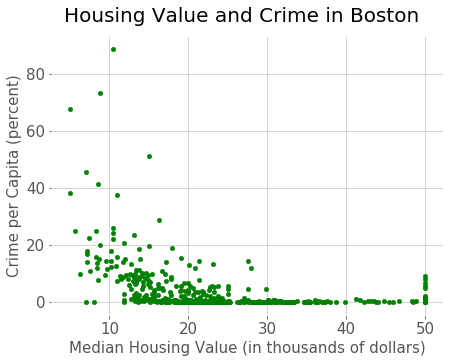

In [11]:
fig = plt.figure(figsize=(7,5))
ax = fig.gca()
plt.style.use('ggplot')
ax.grid(color='lightgray', linestyle='-', linewidth=1)
fig.suptitle('Housing Value and Crime in Boston', fontsize = 20)

ax.scatter(boston['MEDV'], boston['CRIM'], color='green', s=20)

ax.set_facecolor('white')
plt.xlabel('Median Housing Value (in thousands of dollars)', fontsize=15)
plt.ylabel('Crime per Capita (percent)', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.subplots_adjust(bottom = None, top = 0.9)
plt.show()
    

### 2.3: Interpret

What do you observe in the above scatter plot? Does there appear to be a relationship between crime rates and housing prices in Boston? Calculate the correlation between these two variables. Do you think this relationship is causal, or just a correlation? Justify your position.

In [12]:
def R_polyfit(x, y, degree):
    results = {}

    coeffs = np.polyfit(x, y, degree)

     # Polynomial Coefficients
    results['polynomial'] = coeffs.tolist()

    # r-squared
    p = np.poly1d(coeffs)
    # fit values, and mean
    yhat = p(x)                         # or [p(z) for z in x]
    ybar = np.sum(y)/len(y)          # or sum(y)/len(y)
    ssreg = np.sum((yhat-ybar)**2)   # or sum([ (yihat - ybar)**2 for yihat in yhat])
    sstot = np.sum((y - ybar)**2)    # or sum([ (yi - ybar)**2 for yi in y])
    results['determination'] = ssreg / sstot

    return results

poly_degree = 2
print('Poly degree ', poly_degree, ' R value: ', R_polyfit(boston['MEDV'], \
      boston['CRIM'], poly_degree)['determination'])

z = np.polyfit(boston['MEDV'], boston['CRIM'], poly_degree)
p = np.poly1d(z)



Poly degree  2  R value:  0.354455189198


There does appear to be a relationship between median housing value and the percentage of crime that occurs. There appears to be higher rates of crime in areas where housing value is low. There is a rapid decrease in crime as housing value climbs. However, the highest housing value there is a small spike in crime again.

Using a second degree polynomial to fit the data, I calculated a R value of 0.35. 

I expect that this relationship is not causal. I do not think there is a direct relationship where because a house is in cheaper housing area would cause an increase in crime and vice versa. It is more related to the inhabitants and other people who are committing the crimes. It is only because those people tend to be in larger populations in lower housing value areas that we see a higher crime rate.

### 2.4 Correlation Matrix

Calculate the correlation of every pair of variables in the dataset. Create a *K* x *K* matrix where the value in the (*i*,*j*) cell is the correlation between the *i*th and *j*th variable. Show off your skills by coloring the cell so that large positive correlations appear green and large negative correlations appear red (use a gradient to make this pretty). What two variables appear to me most positively and negatively correlated?

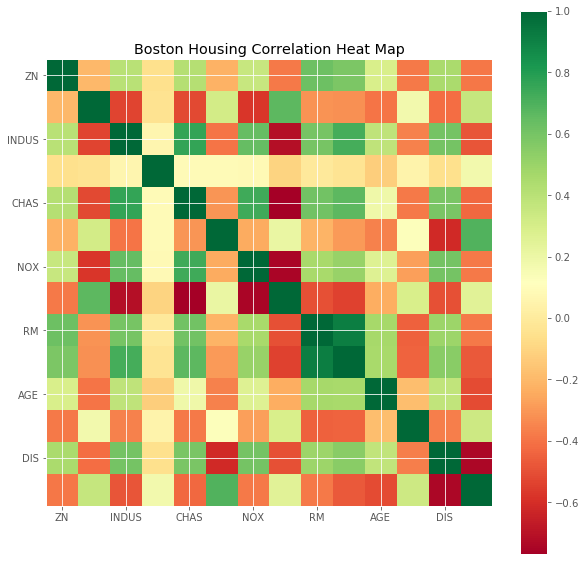

In [13]:
boston.corr()

from matplotlib import cm as cm

fig = plt.figure(figsize=(10,10))
ax1=fig.add_subplot(111)
cmap = cm.get_cmap('RdYlGn')
cax = ax1.imshow(boston.corr(), interpolation='nearest', cmap=cmap)
ax1.grid(True)
labels = list(boston.columns)
ax1.set_xticklabels(labels)
ax1.set_yticklabels(labels)
plt.title('Boston Housing Correlation Heat Map')

ax.matshow(boston.corr())
fig.colorbar(cax)
plt.show()


The highest positive correlation appears to be between the average number of rooms & proportion of owner-occupied units built prior to 1940.

The highest negative correlation exists between 
- proportion of non-retail business acres per town & weighted distances to five Boston employment centres
- nitric oxides concentration & weighted distances to five Boston employment centres
- proportion of owner-occupied units built prior to 1940 & weighted distances to five Boston employment centres
- percent lower status of the population & Median value of owner-occupied homes

### 2.5 Create your own (creative and effective) visualization

Use another type of graph or chart to illustrate an interesting pattern in the data.  Be creative in your visualization, and make sure to produce a "publication-quality" graph.  Points will be given for useful and creative graphs; points will be deducted for confusing issues like unlabeled axes.  If you're new to data visualization, [this guide](http://pubs.aeaweb.org/doi/pdfplus/10.1257/jep.28.1.209) is a good place to start.

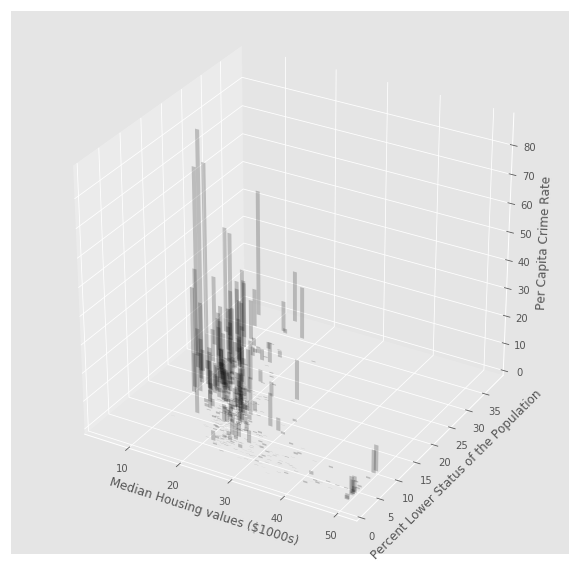

In [14]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np


ax = plt.figure(figsize=(10,10)).gca(projection='3d')

x = boston['MEDV']
y = boston['LSTAT']
z = boston['CRIM']

ax.bar(x, z, y, zdir='y', alpha=0.2, color='black')

ax.set_xlabel('Median Housing values ($1000s)')
ax.set_ylabel('Percent Lower Status of the Population')
ax.set_zlabel('Per Capita Crime Rate')
plt.show()
    